<a href="https://colab.research.google.com/github/ssmseoul/Walmart_dataset_analysis/blob/main/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전자상거래(Walmart) dataset 분석
                                2024년 9월 26일(목)

# kaggle.json 업로드

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"imsulnetflix","key":"ab7794bf4d111623fd0c37c1ebe75bfd"}'}

# kaggle 폴더 생성 및 파일 이동

In [4]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 68 Sep 27 11:10 kaggle.json
/content


# 권한 설정

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

# 데이터 셋 다운로드

In [6]:
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
100% 4.80M/4.80M [00:00<00:00, 47.6MB/s]
100% 4.80M/4.80M [00:00<00:00, 47.2MB/s]


In [7]:
import zipfile

with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [8]:
import pandas as pd

# 데이터셋 로드
df = pd.read_csv('data/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# EDA
- 직업에 따른 선호 물품 관계
- 결혼 여부에 따른 선호 물품 관계
- 구매금액과 사용자 성별 간의 관계
- 구매금액과 결혼 여부

In [ ]:
# 전체 데이터 불러오기
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


전체데이터는 550,068개입니다

In [ ]:
data.info()  # 데이터 유형 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.describe()  # 요약 통계 확인

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# DataFrame의 크기 확인(행열)
df.shape

(550068, 10)

In [ ]:
# 고유한 사용자 수를 계산
unique_users = df['User_ID'].nunique()

print(f"사용자 수: {unique_users}")

사용자 수: 5891


In [ ]:
# 고유 값(unique values)이 각각 몇 번 등장했는지를 계산하여, 그 빈도를 반환(내림차순)
df['User_ID'].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002690,7
1002111,7
1005810,7


In [ ]:
# DataFrame의 기술 통계 정보(descriptive statistics)를 반환하는 메서드
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
unique_products = df['Product_ID'].nunique()
print(f"제품 수: {unique_products}")

제품 수: 3631


In [ ]:
unique_occupations = df['Occupation'].nunique()
print(f"직업 수: {unique_occupations}")

직업 수: 21


In [ ]:
unique_ages = df['Age'].nunique()
print(f"나이구간 수: {unique_ages}")

나이구간 수: 7


In [ ]:
unique_cities = df['City_Category'].nunique()
print(f"도시 수: {unique_cities}")

도시 수: 3


In [ ]:
# 가장 비싼 제품 찾기
max_price_row = df.loc[df['Purchase'].idxmax()]

# 제품명과 가격 출력
print(f"가장 비싼 제품: {max_price_row['Product_ID']}")
print(f"가격: {max_price_row['Purchase']}")
print(f"카테고리: {max_price_row['Product_Category']}")

가장 비싼 제품: P00052842
가격: 23961
카테고리: 10


<Axes: xlabel='Purchase', ylabel='Count'>

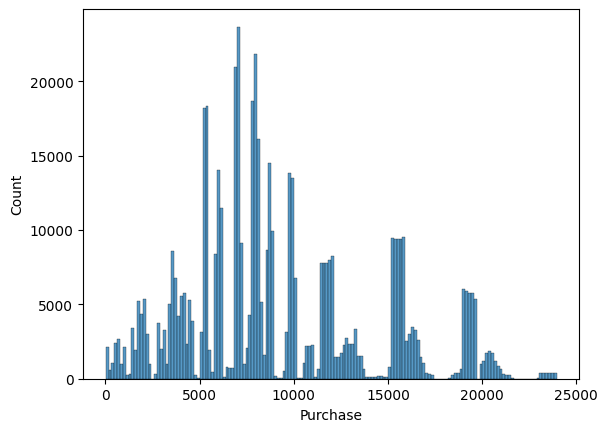

In [ ]:
# 'Purchase' 열에 대한 히스토그램
sns.histplot(df['Purchase'])

In [ ]:
df[df['Product_ID']=='P00052842']['Purchase']

,Purchase
1041,23341
1596,18886
2034,18440
2569,18617
2900,18532
...,...
543393,23726
543823,23642
543995,23945
544174,19352


In [ ]:
# 가장 많이 팔린 제품 찾기
max_sales_row = df.loc[df['Product_ID'].idxmax()]

# 제품명과 판매량 출력
print(f"가장 많이 팔린 제품: {max_sales_row['Product_ID']}")

가장 많이 팔린 제품: P0099942


In [ ]:
# 각 사용자의 구매 횟수 계산
user_visit_counts = df['User_ID'].value_counts()

# 가장 자주 찾는 사용자 ID 찾기
most_frequent_user = user_visit_counts.idxmax()

# 가장 자주 찾는 사용자의 정보 추출
most_frequent_user_info = df[df['User_ID'] == most_frequent_user].iloc[0]

# 연령대와 직업 출력
print(f"가장 자주 찾는 사용자의 연령대: {most_frequent_user_info['Age']}")
print(f"가장 자주 찾는 사용자의 직업: {most_frequent_user_info['Occupation']}")

가장 자주 찾는 사용자의 연령대: 26-35
가장 자주 찾는 사용자의 직업: 20


In [ ]:
# 가장 자주 찾는 사용자의 직업군
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


<Axes: xlabel='count', ylabel='Age'>

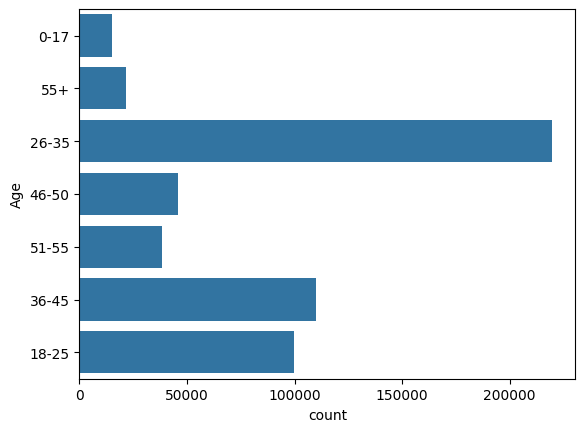

In [ ]:
import seaborn as sns

# 'Age' 열에 있는 데이터의 빈도를 시각적으로 표현하는 카운트 플롯
sns.countplot(df['Age'])

# EDA
2024년 9월 27일(목)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


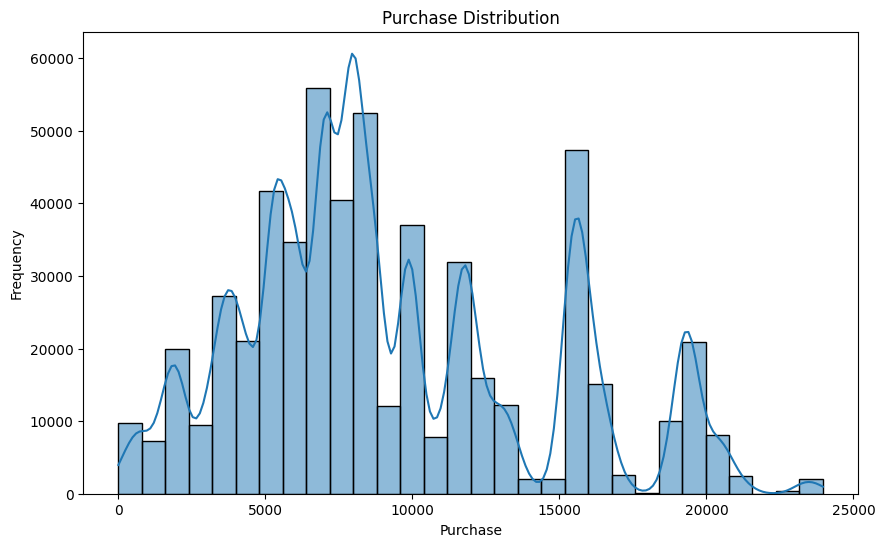

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Purchase Distribution')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

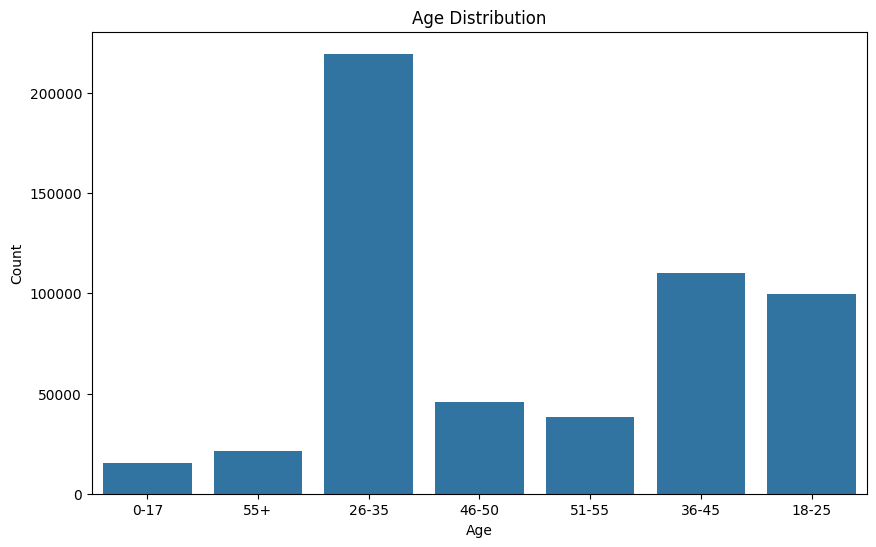

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

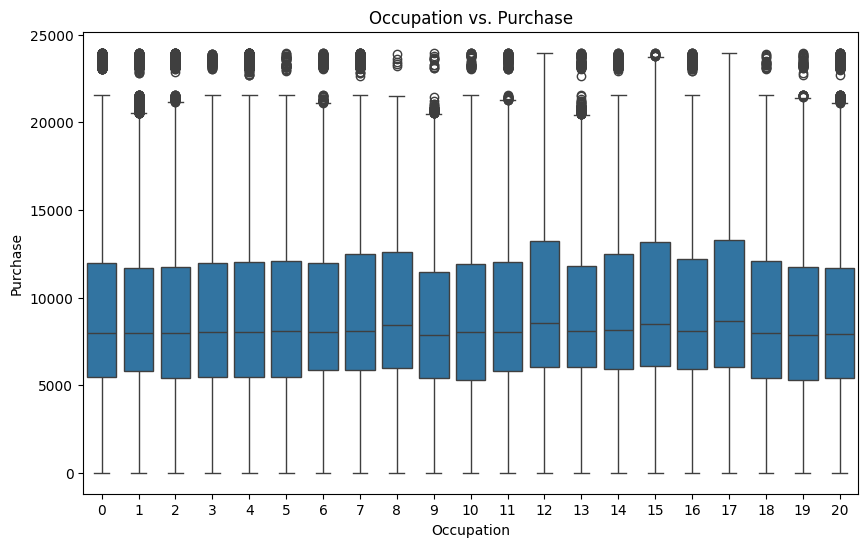

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.title('Occupation vs. Purchase')
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt

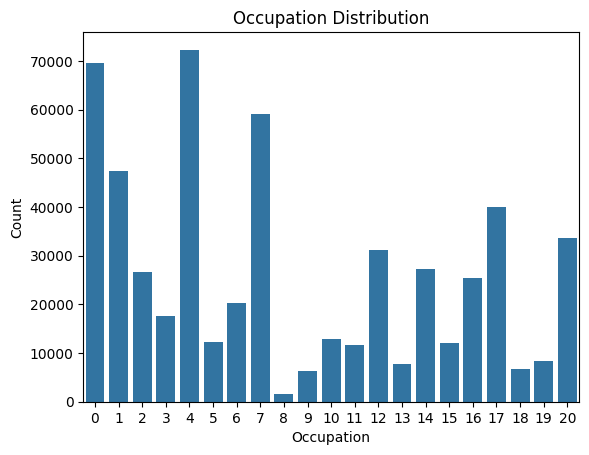

In [14]:
sns.countplot(x='Occupation', data=df)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()